In [1]:
# -*- coding: utf8

from scipy import stats as ss

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Para evitar a confus√£o da aula passada, colocando alguns defaults!
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Aula 12 - Poder de um Teste

## Introdu√ß√£o

Neste notebook vamos entender um pouco sobre o poder de um teste. Para isto, vamos relembrar do caso mais simples de moedas viesadas e n√£o viesadas. Em particular, vamos assumir um lan√ßamento de 100 moedas. Vamos contar quantas vezes as mesmas caem em cara.

Como j√° falamos, tais dados podem ser modelados por uma Binomial. Sendo $p$ a propor√ß√£o de caras e $n$ o n√∫mero de vezes que lan√ßo a moeda:

$$k \sim Binomial(p, n)$$

Ou seja, podemos amostrar o n√∫mero de caras $k$ usando uma Binomial.

In [4]:
N = 100
alpha = 0.05

Usando o c√≥digo da Binomial em Python, temos v√°rias fun√ß√µes que nos ajuda. Uma delas define qual √© o intervalo onde caem 95% dos lan√ßamentos. Ent√£o, esta √© a faixa esperada de uma moeda n√£o viesada ($p=.5$).

In [5]:
lower, upper = ss.binom.interval(1 - alpha, N, 0.5)
(lower, upper)

(40.0, 60.0)

Abaixo vemos alguns plots:
1. 95% dos casos na regi√£o verde
1. 5% na vermelha

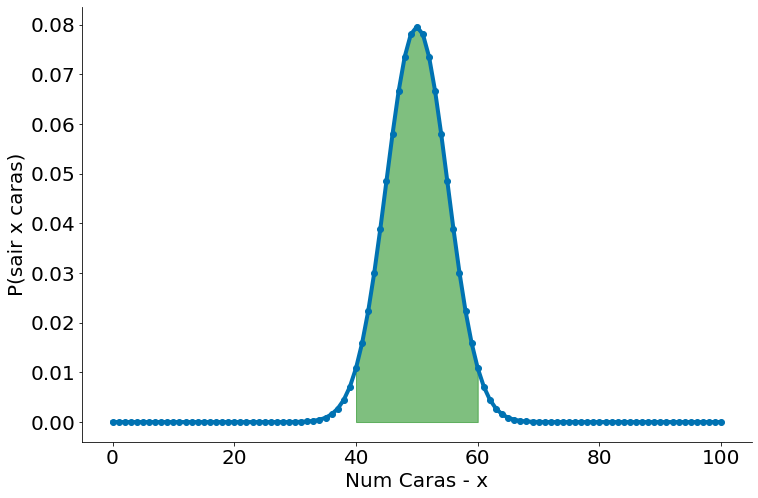

In [6]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x, N, 0.5)
plt.plot(x, prob_binom, 'o-')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(40, 61) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x2, N, 0.5)
plt.fill_between(x2, prob_binom, color='g', alpha=0.5)

despine()

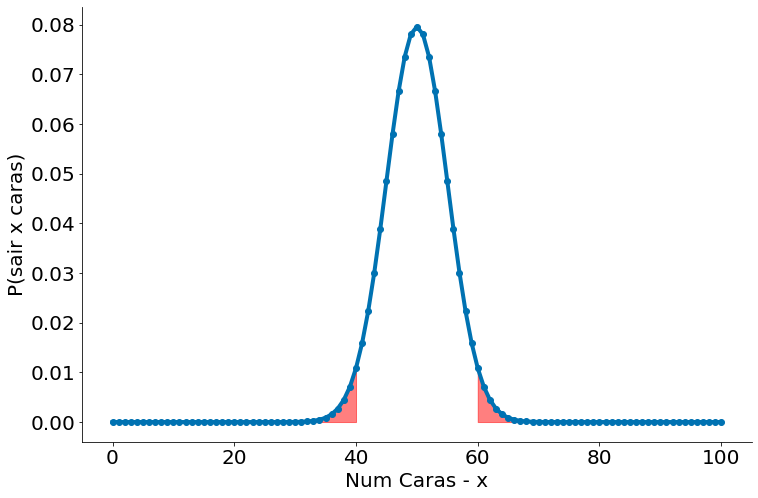

In [7]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x, N, 0.5)
plt.plot(x, prob_binom, 'o-')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(60, 100) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x2, N, 0.5)
plt.fill_between(x2, prob_binom, color='r', alpha=0.5)

x3 = np.arange(0, 41) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x3, N, 0.5)
plt.fill_between(x3, prob_binom, color='r', alpha=0.5)

despine()

## Tipos de Erros

Vamos agora definir nossa hip√≥tese nula:

$H_0$: **p == 0.5**

Ao realizar um experimento, lan√ßar algumas moedas para cima, caso eu rejeite $H_0$ tenho evid√™ncia de que a moeda n√£o √© justa (n√£o-viesada). Precisamos tomar uma decis√£o sobre a *signific√¢ncia*, que mede o quanto estamos dispostos a cometer um *erro do tipo 1* (‚Äúfalso positivo‚Äù), no qual rejeitamos $H_0$, embora ela seja verdade.Vamos escolher $5\%$ (ver slides sobre a discuss√£o de Fisher).

Considere o teste que rejeita $H_0$ se $X$ estiver fora dos limites dados por: (40, 60). Ver plots acima. Para entender um erro do tipo 1, considere a figura abaixo que compara noessa moeda com outra onde $p=0.6$. A regi√£o rosa consiste de mais ou menos $50%$ dos casos desta moeda. Note que tais casos todos caem no intervalo de $2.5\%$ (para a direita, maior, metade de $5\%$). Podemos errar, mas esperamos bem mais vezes $50\%$ de que a moeda injusta caia no intervalo. 

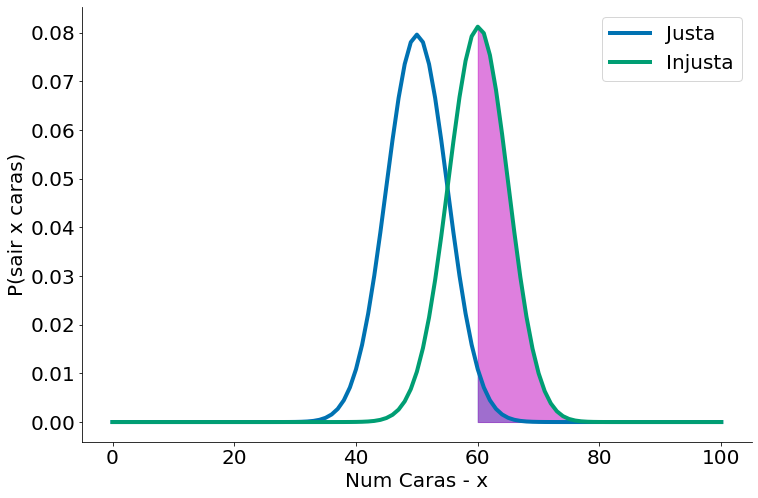

In [8]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, N, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, N, 0.6)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(60, 100) # Valores no eixo x
fill_prob_binom_fair = ss.distributions.binom.pmf(x2, N, 0.5)
plt.fill_between(x2, fill_prob_binom_fair, color='c', alpha=0.5)

fill_prob_binom_unfair = ss.distributions.binom.pmf(x2, N, 0.6)
plt.fill_between(x2, fill_prob_binom_unfair, color='m', alpha=0.5)

plt.legend()
despine()

Portanto, assumindo que $p$ √© realmente igual a $0.5$ (ou seja, $H_0$ √© verdade), h√° apenas $5\%$ de chance de observarmos um $X$ que est√° fora desse intervalo, que √© o significado exato que quer√≠amos. Dito de forma diferente, se $H_0$ for verdadeiro, ent√£o, aproximadamente $19$ vezes de $20$ este teste dar√° o resultado correto.

Tamb√©m estamos frequentemente interessados no *poder* (ou *power*) de um teste, que √© a probabilidade de n√£o cometer um *erro do tipo 2*, em que n√£o podemos rejeitar $H_0$, mesmo ela sendo falsa. Para medir isso, temos que especificar o que √© exatamente $H_0$ ser falsa. (Saber apenas que $p$ n√£o √© $0.5$ n√£o fornece muitas informa√ß√µes sobre a distribui√ß√£o de $X$.) Em particular, vamos verificar o que acontece se $p$ for, na verdade, $0.06$, de modo que a moeda seja ligeiramente tendenciosa a dar "cara". Nesse caso, gostar√≠amos de rejeitar $H_0$.

Tal erro, capturado $\beta$, pode ser ilustrado na regi√£o onde a moeda viesada cai no intervalo (40, 60). Aqui, uma moeda viesada parece justa!

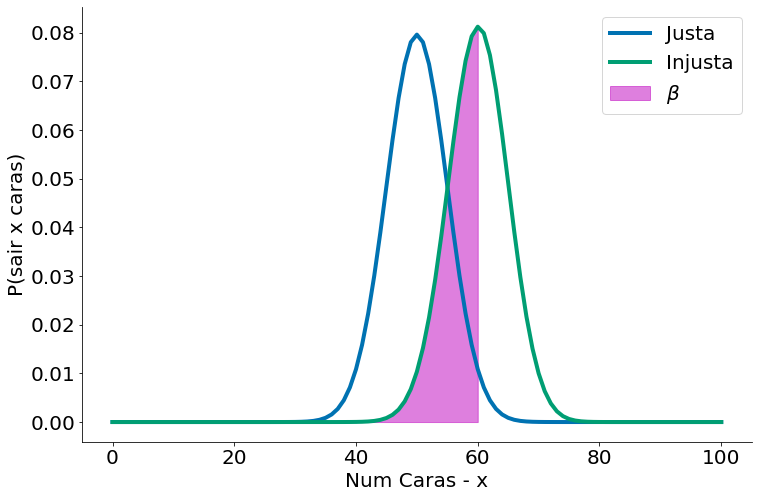

In [9]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, N, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, N, 0.6)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(40, 61) # Valores no eixo x
fill_prob_binom_unfair = ss.distributions.binom.pmf(x2, N, 0.6)
plt.fill_between(x2, fill_prob_binom_unfair, color='m', alpha=0.5, label=r'$\beta$')

plt.legend()
despine()

Usando a CDF, poemos ver tais chances.! Em particular queremos:

$P(X <= 60) - P(x <= 40)$

In [10]:
beta = ss.binom.cdf(upper, N, 0.6) - ss.binom.cdf(lower, N, 0.6)
beta

0.5378821927269787

x = np.arange(0, 101) # Valores no eixo x
y = ss.binom.cdf(x, N, 0.6)
plt.plot(x, y)
plt.xlabel('Num Caras - x')
plt.ylabel('P(X < x)')

x2 = np.arange(40, 61) # Valores no eixo x
fill = ss.binom.cdf(x2, N, 0.6)
plt.fill_between(x2, fill, color='m', alpha=0.5, label=r'$\beta$')

O poder √© dado por 1-$\beta$.

In [11]:
1 - beta

0.4621178072730213

As an√°lises acima indicam que, quando a moeda for tendenciosa com ùëù=0.6, 53% das vezes a vari√°vel ùëã ter√° um valor dentro do intervalo [40,60]. Em outras palavras, o nosso teste vai rejeitar ùêª0 corretamente quando ùëù=0.6.

Observe que o valor de $\beta$ √© bem menor (quase zero) quando uma moeda √© muito viesada. Outra forma de ver √© que temos muito poder $1-\beta$.

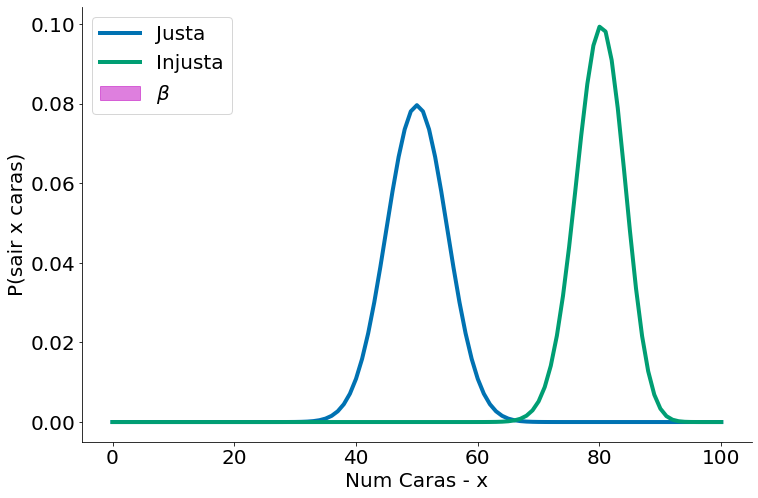

In [12]:
x = np.arange(0, 101) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, N, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, N, 0.8)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

x2 = np.arange(40, 61) # Valores no eixo x
fill_prob_binom_unfair = ss.distributions.binom.pmf(x2, N, 0.8)
plt.fill_between(x2, fill_prob_binom_unfair, color='m', alpha=0.5, label=r'$\beta$')

plt.legend()
despine()

Definindo uma fun√ß√£o power (abaixo), podemos agora explorar melhor o poder para diferentes moedas viesadas.

In [13]:
def power(alt, n):
    lower, upper = ss.binom.interval(1 - 0.05, n, 0.5)
    beta = ss.binom.cdf(upper, n, alt) - ss.binom.cdf(lower, n, alt)
    return 1 - beta

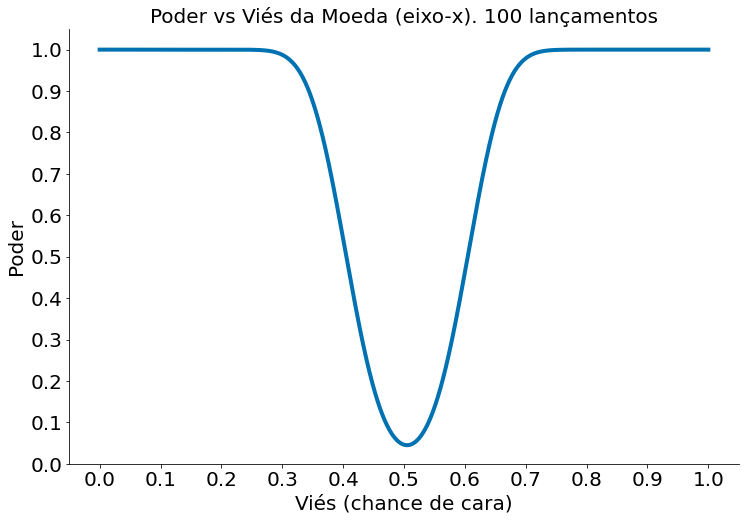

In [14]:
fig, ax = plt.subplots(1, 1)
ax.set_title('Poder vs Vi√©s da Moeda (eixo-x). 100 lan√ßamentos')

def plot_power(n, ax, **kwargs):
    alternativas = np.linspace(0, 1, 1000)
    ax.plot(alternativas, power(alternativas, n), **kwargs)
    ax.set_xticks(np.arange(0,1.1, 0.1))
    ax.set_yticks(np.arange(0,1.1, 0.1))
    ax.set_ybound((0, 1.05))
    ax.set_ylabel('Poder')
    ax.set_xlabel('Vi√©s (chance de cara)')
    
plot_power(N, ax)
despine()

Como esperado, temos muito mais poder quando estamos mais longe de $p=0.5$. Isto √© o nosso efeito. Ao sumarizar um teste de hip√≥teses, √© bom ver qual √© a dist√¢ncia entre o observado e o esperado (no modelo nulo). Posso dizer chegar em conclus√µes erradas para uma moeda onde $p=0.51$. 

Um outro fator importante √© que quanto maior nossos dados mais poder. Ou seja, mais chances de dizer $p=0.51$ √© viesado. Por√©m qual o efeito pr√°tico disto? Moedas n√£o viesadas existem apenas na teoria.

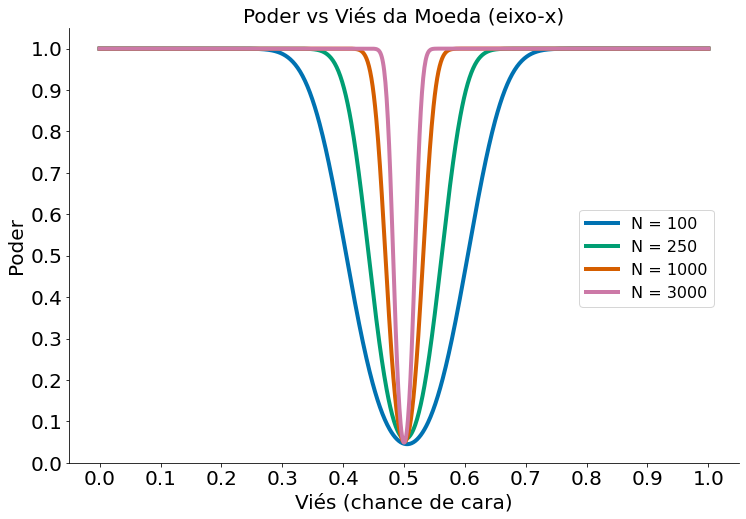

In [15]:
fig, ax = plt.subplots(1, 1)

def plot_powers(ax):
    ax.set_title('Poder vs Vi√©s da Moeda (eixo-x)')
    plot_power(100, ax,  label="N = 100")
    plot_power(250, ax,  label="N = 250")
    plot_power(1000, ax, label="N = 1000")
    plot_power(3000, ax, label="N = 3000")
    ax.legend(bbox_to_anchor=(0.75, 0.6), loc=2, prop={'size':16})
    
plot_powers(ax)
despine()

Podemos ver como mais dados aumenta o poder. Compare o caso abaixo com o caso com 100 lan√ßamentos!

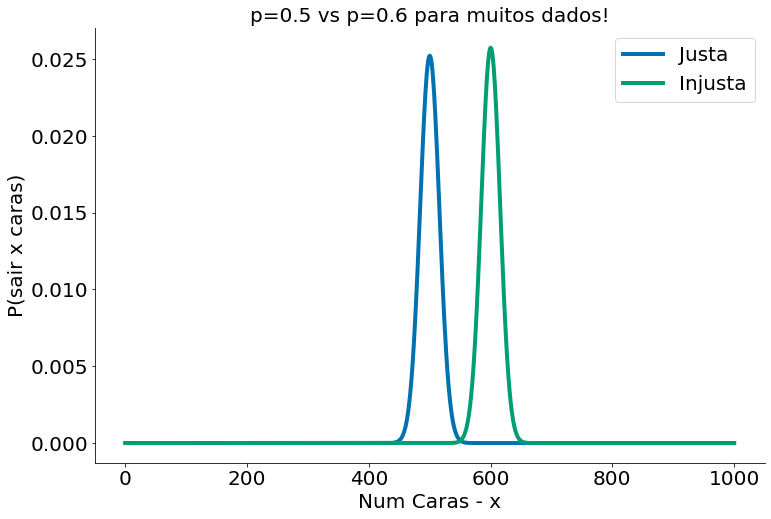

In [16]:
x = np.arange(0, 1001) # Valores no eixo x
prob_binom_fair = ss.distributions.binom.pmf(x, 1000, 0.5)
prob_binom_unfair = ss.distributions.binom.pmf(x, 1000, 0.6)
plt.plot(x, prob_binom_fair, label='Justa')
plt.plot(x, prob_binom_unfair, label='Injusta')
plt.xlabel('Num Caras - x')
plt.ylabel('P(sair x caras)')

plt.title('p=0.5 vs p=0.6 para muitos dados!')
plt.legend()
despine()

## Dicas

Ao realizar um teste sempre indique:
1. A hip√≥tese nula
1. Qual o tamanho da amostra
1. Qual o tamanho do efeito

Com muitas amostras, at√© efeitos pequenos s√£o significativos. Por√©m, sem muitas consequ√™ncias na pr√°tica!

## Para maior explora√ß√£o

* O Coursera oferece um [curso de An√°lise de Dados e Infer√™ncia Estat√≠stica](https://www.coursera.org/specializations/statistics) que abrange muitos desses t√≥picos.
* O All of Statistics aborda tal problema com mais detalhes te√≥ricos.